In [18]:
import sys
import requests
import pandas as pd
from pathlib import Path
pd.set_option('display.max_columns', None)
sys.path.append(str(Path().parent / "src"))
import avfetch
av_key = str(Path("av_key").read_text().strip())
frequency = "Daily"
series = avfetch.series(av_key=av_key,outputsize='full',frequency=frequency)

In [67]:
df = pd.read_csv(str(Path()/"example_data"/"daily_prices.csv")).set_index('date')
df.index = pd.to_datetime(df.index)

In [68]:
df_cleaned = df.dropna(axis=1,how='all')

['ASML_USD_EUR', 'NVDA_USD_EUR', 'INTC_USD_EUR', 'AMD_USD_EUR', 'ARM_USD_EUR', 'AMZN_USD_EUR', 'AAPL_USD_EUR', 'NET_USD_EUR', 'MSFT_USD_EUR', 'JPM_USD_EUR', 'SPY_USD_EUR', 'GS_USD_EUR', 'MS_USD_EUR', 'UBS_USD_EUR', 'LMT_USD_EUR', 'RTX_USD_EUR', 'GE_USD_EUR', 'BA_USD_EUR', 'GD_USD_EUR', 'PEP_USD_EUR', 'KO_USD_EUR', 'BATS.LON_GBP_EUR', 'SHEL.LON_GBP_EUR']


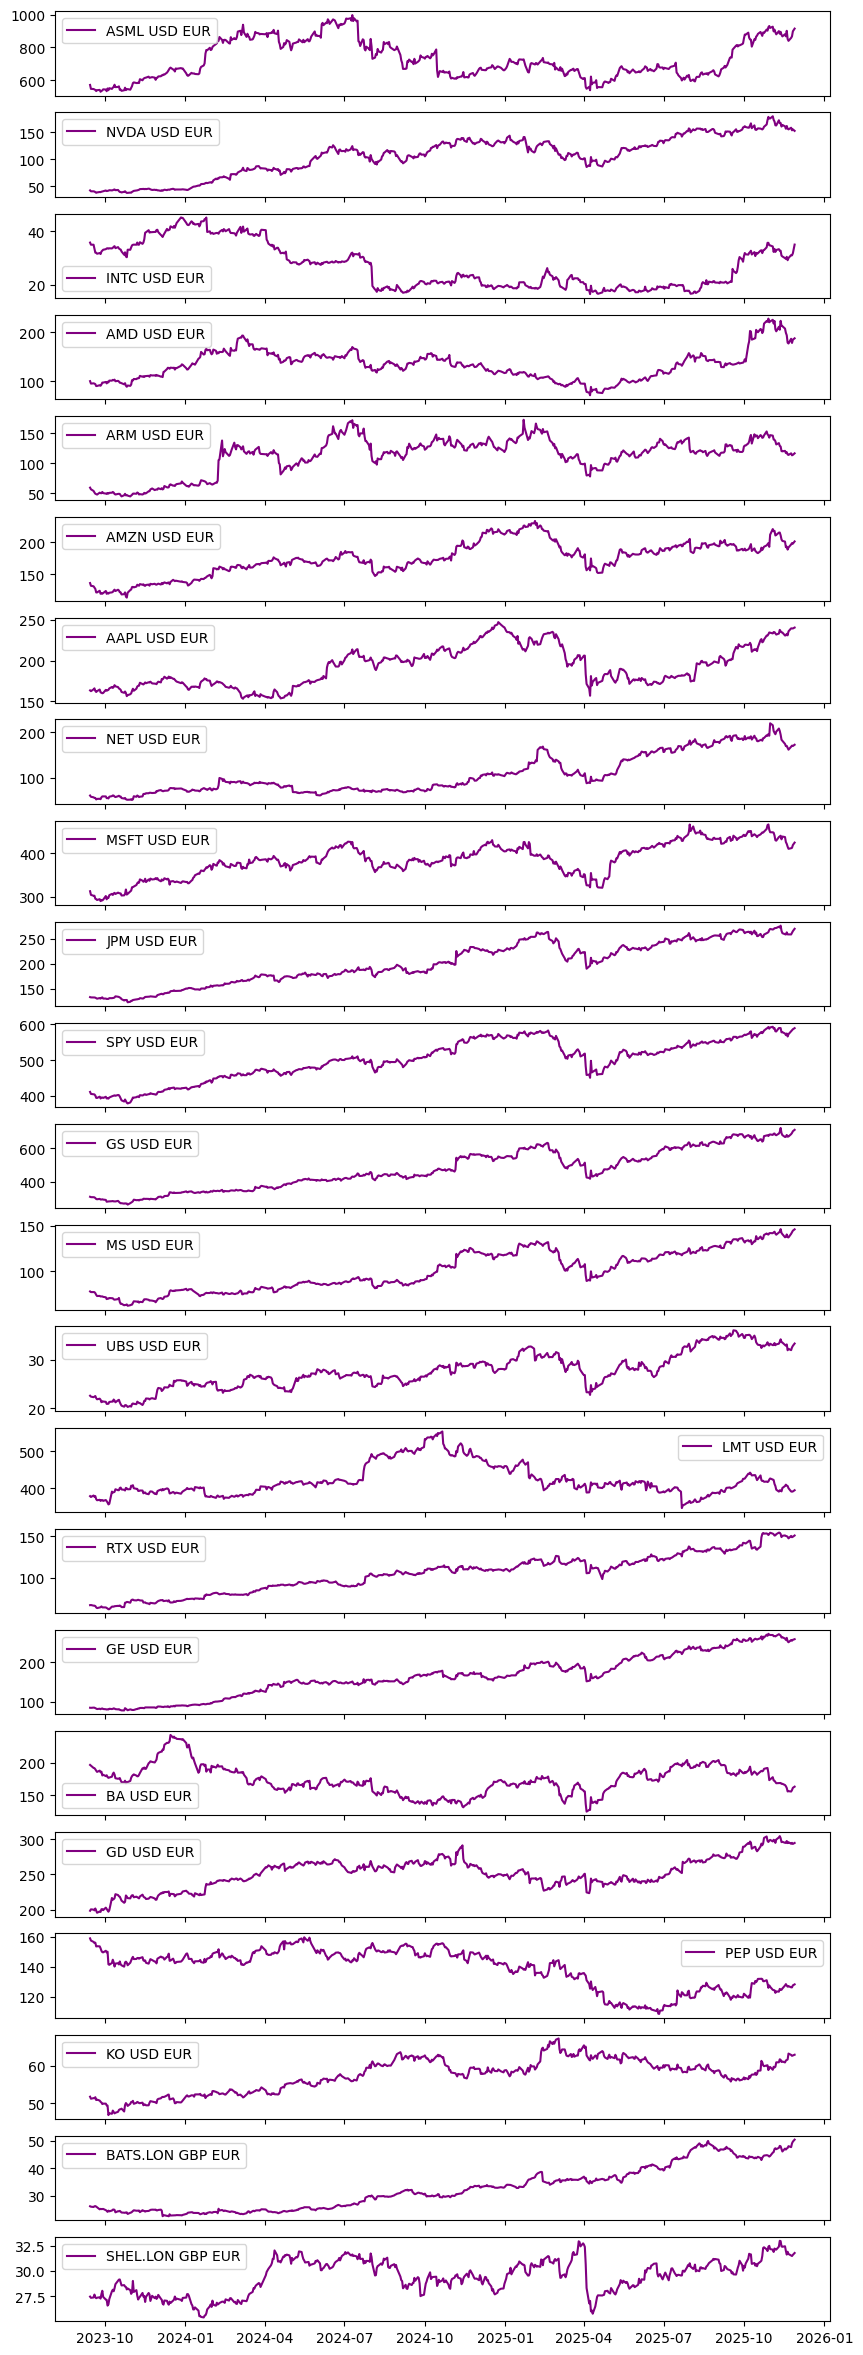

In [69]:
prices = df_cleaned.sort_index(ascending=False).dropna(axis=0,how='any').filter(like=f'_{dest_currency}')
prices.index = pd.to_datetime(prices.index)
import plotters.PlotCols as plot
price_plot = plot(prices,figsize=(10,30))

In [70]:
prices

,ASML_USD_EUR,NVDA_USD_EUR,INTC_USD_EUR,AMD_USD_EUR,ARM_USD_EUR,AMZN_USD_EUR,AAPL_USD_EUR,NET_USD_EUR,MSFT_USD_EUR,JPM_USD_EUR,SPY_USD_EUR,GS_USD_EUR,MS_USD_EUR,UBS_USD_EUR,LMT_USD_EUR,RTX_USD_EUR,GE_USD_EUR,BA_USD_EUR,GD_USD_EUR,PEP_USD_EUR,KO_USD_EUR,BATS.LON_GBP_EUR,SHEL.LON_GBP_EUR
date,,,,,,,,,,,,,,,,,,,,,,,
2025-11-28,914.038000,152.627100,34.974888,187.576119,116.893388,201.105606,240.452355,172.641083,424.260223,269.968884,589.287197,712.294292,146.297818,33.284780,394.812678,150.824893,257.353435,162.974700,294.587549,128.258502,63.051376,50.458641,31.769199
2025-11-26,897.628431,155.438198,31.741263,184.739152,114.349603,197.604668,239.331365,169.864477,418.646650,265.277972,586.088064,703.645423,144.814662,32.810515,391.622168,149.341737,255.775426,161.181116,293.216492,127.603154,62.844424,49.743433,31.584854
2025-11-25,866.982724,153.672044,30.964286,178.137546,113.590448,198.480814,239.357474,170.670858,412.214758,261.852600,583.352284,693.364944,142.964606,32.485278,390.972722,148.772030,253.590848,157.664648,294.752694,126.268262,62.749562,49.085123,31.471825
2025-11-24,857.328978,158.435145,31.062141,186.641895,116.914809,196.388412,239.470968,168.363921,411.384600,258.634200,580.390767,686.257209,141.320157,31.930041,391.474974,150.328959,255.205995,155.458248,293.463027,126.279450,63.000861,47.717332,31.523461
2025-11-21,839.466045,155.357280,29.963250,176.982930,114.268545,191.669265,235.789065,161.871030,410.036220,258.830370,572.367555,672.245055,137.370645,32.195295,400.187430,147.367080,249.641640,156.069450,295.585290,127.087605,63.357075,48.069867,31.671298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,539.687576,39.567625,31.973323,94.048682,49.592543,126.807317,162.750844,56.247373,295.653770,131.937170,400.784068,301.072108,75.746380,22.519443,379.021183,66.415723,84.838805,189.681401,201.844267,156.133980,51.584176,26.191820,27.405552
2023-09-19,542.551075,40.715416,33.451225,95.117121,51.644637,128.835443,165.858349,56.325137,302.528951,132.328025,403.984941,305.321533,76.838750,22.387523,377.081901,66.909961,85.733524,191.413728,199.172720,155.881635,51.288930,26.120001,27.677078
2023-09-18,545.469341,41.079945,34.925233,95.705713,54.224200,130.867302,164.628196,57.702028,302.518064,132.326995,404.305516,306.205547,76.913654,22.281606,380.627395,66.913193,85.888869,191.766688,200.238455,156.607239,51.328833,25.860940,27.393422


In [71]:
returns = ((prices - prices.shift(-1)) / prices.shift(-1)).dropna()
average_returns = returns.mean()
if frequency == "Daily":
    Nt = 252
elif frequency == "Weekly":
    Nt = 52
elif frequency == "Monthly":
    Nt = 12
annualized_average_returns = average_returns * Nt
annualized_average_returns

ASML_USD_EUR        0.304158
NVDA_USD_EUR        0.715573
INTC_USD_EUR        0.154118
AMD_USD_EUR         0.435021
ARM_USD_EUR         0.578405
AMZN_USD_EUR        0.236045
AAPL_USD_EUR        0.217686
NET_USD_EUR         0.606254
MSFT_USD_EUR        0.167678
JPM_USD_EUR         0.357719
SPY_USD_EUR         0.181589
GS_USD_EUR          0.429126
MS_USD_EUR          0.337728
UBS_USD_EUR         0.216619
LMT_USD_EUR         0.046038
RTX_USD_EUR         0.402738
GE_USD_EUR          0.555557
BA_USD_EUR         -0.024110
GD_USD_EUR          0.204046
PEP_USD_EUR        -0.078085
KO_USD_EUR          0.104357
BATS.LON_GBP_EUR    0.325342
SHEL.LON_GBP_EUR    0.086418
dtype: float64

In [72]:
from pypfopt import expected_returns, EfficientSemivariance

es = EfficientSemivariance(annualized_average_returns, returns, frequency=Nt, weight_bounds=(0,0.25))
asml_idx = prices.columns.get_loc("SPY_USD_EUR")
es.add_constraint(lambda w, idx=asml_idx: w[idx] >= 0.20)
es.efficient_return(0.075)

weights = es.clean_weights()
print("Weights:")
for i,j in weights.items():
    print("  ",i,j)
print()
performance = es.portfolio_performance(verbose=True)

Weights:
   ASML_USD_EUR 0.01771
   NVDA_USD_EUR 0.0
   INTC_USD_EUR 0.0
   AMD_USD_EUR 0.0
   ARM_USD_EUR 0.0
   AMZN_USD_EUR 0.0
   AAPL_USD_EUR 0.0
   NET_USD_EUR 0.0
   MSFT_USD_EUR 0.02304
   JPM_USD_EUR 0.0
   SPY_USD_EUR 0.2
   GS_USD_EUR 0.0
   MS_USD_EUR 0.0
   UBS_USD_EUR 0.0308
   LMT_USD_EUR 0.06525
   RTX_USD_EUR 0.0
   GE_USD_EUR 0.0
   BA_USD_EUR 0.0
   GD_USD_EUR 0.01503
   PEP_USD_EUR 0.00839
   KO_USD_EUR 0.31972
   BATS.LON_GBP_EUR 0.21459
   SHEL.LON_GBP_EUR 0.10546

Expected annual return: 17.0%
Annual semi-deviation: 7.3%
Sortino Ratio: 2.31


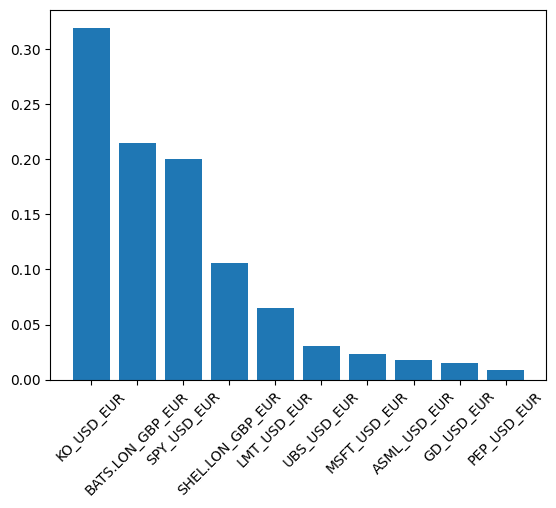

In [73]:
w = pd.Series(weights).sort_values(ascending=False)
w = w.where(w > 0).dropna()

import matplotlib.pyplot as plt
plt.bar(w.index, w.values)
plt.xticks(rotation=45)
plt.show()

In [16]:
spot = avfetch.spot(av_key)

P = 50_000
P_actual = 0
portfolio = {}

print(
    f"{"ticker": <10}",
    f"{"price": <10}",
    f"{"quantity": <10}",
    f"{"target": <10}",
    f"{"actual": <10}",
)

for i in w.index:
    target_amount = w[i] * P
    ticker = i.split('_')[0]
    source_currency = i.split('_')[1]
    if len(i.split('_')) < 3 and i.split('_')[0] == 'BTC':
        date, price = spot.fx("BTC",dest_currency)
        n_tokens = target_amount / price
        position = n_tokens * price
        P_actual += position
        print(
            f"{ticker: <10}", 
            f"{round(price,2): <10}", 
            f"{round(n_tokens,5): <10}", 
            f"{round(target_amount,2): <10}", 
            f"{round(position,2): <10}"
        )
        portfolio[ticker] = [price, n_tokens, position]
        pass
    else:
        destination_currency = i.split('_')[2]
        if source_currency != destination_currency:
            price_date, source_price = spot.equity(ticker)
            if source_currency == "GBP":
                source_price /= 100
            ex_date, exchange_rate = spot.fx(from_currency=source_currency,to_currency=destination_currency)
            dest_price = source_price * exchange_rate
            n_stock = int(target_amount // dest_price)
            position = dest_price * n_stock
            P_actual += position
            print(
                f"{ticker: <10}", 
                f"{round(source_price,2): <10}", 
                f"{int(n_stock): <10}", 
                f"{round(target_amount,2): <10}",
                f"{round(position,2): <10}"
            )
            portfolio[ticker] = [source_price, n_stock, position]
        else:
            price_date, price = spot.equity(ticker)
            n_stock = int(target_amount // price)
            position = price * n_stock
            P_actual += position
            print(
                f"{ticker: <10}", 
                f"{round(source_price,2): <10}", 
                f"{int(n_stock): <5}", 
                f"{round(target_amount,2): <10}",
                f"{round(position,2): <10}"
            )
            portfolio[ticker] = [source_price, n_stock, position]

print(f"\nPostition: {dest_currency} {round(P_actual,2)}")

ticker     price      quantity   target     actual    
PEP        148.74     207        26586.5    26540.27  
BA         189.0      64         10514.0    10426.75  
SPY        683.39     16         10000.0    9425.31   
INTC       40.56      82         2893.5     2866.94   

Postition: EUR 49259.28


In [17]:
portfolio_df = pd.DataFrame(portfolio).T
portfolio_df.columns = ['source_price', 'quantity', f'{dest_currency}_position']
portfolio_df['w'] = portfolio_df['EUR_position'] / portfolio_df['EUR_position'].sum()
portfolio_df

,source_price,quantity,EUR_position,w
PEP,148.74,207.0,26540.27316,0.538787
BA,189.00,64.0,10426.75200,0.211671
SPY,683.39,16.0,9425.31488,0.191341
INTC,40.56,82.0,2866.94304,0.058201
